<a href="https://colab.research.google.com/github/martakrusz/COVID-19/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
CONFIRMED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'


In [ ]:
import pandas as pd
from doctest import testmod #to import module for testing

In [ ]:
confirmed = pd.read_csv(CONFIRMED)
deaths = pd.read_csv(DEATHS)
recovered = pd.read_csv(RECOVERED)

In [ ]:
#query = confirmed['Country/Region'] == 'Poland'
#pl = confirmed.loc[query]
#pl = pl.transpose()[4:] #to show 5 first lines of dataset
pl = (
    confirmed
    .loc[confirmed['Country/Region'] == 'Poland']
    .transpose()[4:]
)
pl.columns = ['Confirmed'] #to give name to a column
pl

,Confirmed
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
1/27/21,1489512
1/28/21,1496665
1/29/21,1502810
1/30/21,1508674


In [ ]:
pl.index #to show indexes


Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '1/22/21', '1/23/21', '1/24/21', '1/25/21', '1/26/21', '1/27/21',
       '1/28/21', '1/29/21', '1/30/21', '1/31/21'],
      dtype='object', length=376)

In [ ]:
pd.to_datetime(pl.index) #change date for European

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31'],
              dtype='datetime64[ns]', length=376, freq=None)

In [ ]:
pl.index = pd.to_datetime(pl.index) #permanently turns the European date into the index
pl

,Confirmed
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2021-01-27,1489512
2021-01-28,1496665
2021-01-29,1502810
2021-01-30,1508674


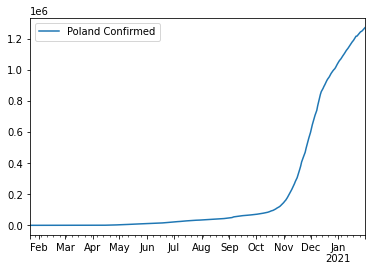

In [ ]:
pl = (
    recovered
    .loc[recovered['Country/Region'] == 'Poland']
    .transpose()[4:]
)

pl.columns = ['Poland Confirmed']
pl.index = pd.to_datetime(pl.index)
pl.plot()

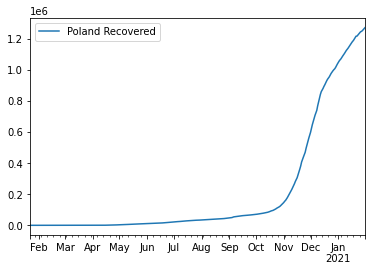

In [ ]:
# other form of data retrieval
pl = (
    recovered
    .loc[recovered['Country/Region'] == 'Poland']
    .transpose()[4:]
)

pl.columns = ['Poland Recovered']
pl.index = pd.to_datetime(pl.index)
pl.plot()

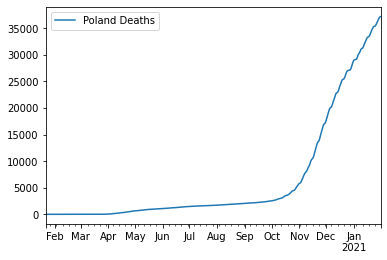

In [ ]:
pl = (
    deaths
    .loc[deaths['Country/Region'] == 'Poland']
    .transpose()[4:]
)

pl.columns = ['Poland Deaths']
pl.index = pd.to_datetime(pl.index)
pl.plot()

In [ ]:
def get(country, name, data):
    df = (data
          .loc[data['Country/Region'] == country]
          .transpose()[4:])
    df.columns = [name]
    df.index = pd.to_datetime(df.index)
    return df

In [ ]:

pl_confirmed = get('Poland', 'Poland Confirmed', confirmed)
pl_deaths = get('Poland', 'Poland Deaths', deaths)
pl_recovered = get('Poland', 'Poland Recovered', recovered)

In [ ]:
pl = pd.concat((pl_confirmed,pl_deaths,pl_recovered), axis='columns')
pl

,Poland Confirmed,Poland Deaths,Poland Recovered
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2021-01-27,1489512,36054,1246267
2021-01-28,1496665,36443,1250892
2021-01-29,1502810,36780,1257352
2021-01-30,1508674,37082,1264574


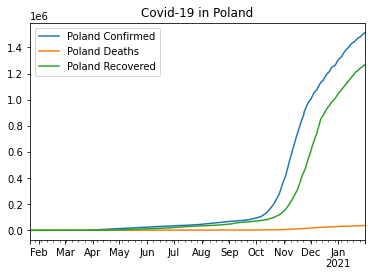

In [ ]:
pl.plot( title = 'Covid-19 in Poland')

In [ ]:
us_confirmed = get('US', 'USA Confirmed', confirmed)
us_deaths = get('US', 'USA Deatchs', deaths)
us_recovered = get('US', 'USA Recovered', recovered)

us = pd.concat((us_confirmed,us_deaths,us_recovered), axis='columns')

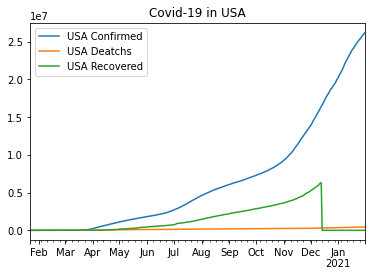

In [ ]:
us.plot( title = 'Covid-19 in USA')

In [ ]:
# a definition that supports different countries
def _get(country, name, data):
    df = (data
          .loc[data['Country/Region'] == country]
          .transpose()[4:])
    df.columns = [name]
    df.index = pd.to_datetime(df.index)
    return df

def get(country):
    c = _get(country, 'Confirmed', confirmed)
    d = _get(country, 'Deaths', deaths)
    r = _get(country, 'Recovered', recovered)
    return pd.concat((c, d, r), axis='columns')

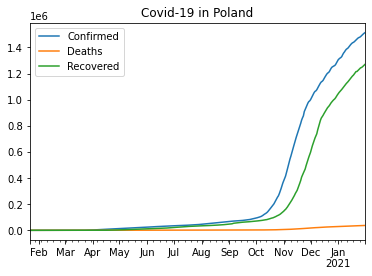

In [ ]:
pl = get('Poland')
pl.plot( title = 'Covid-19 in Poland')

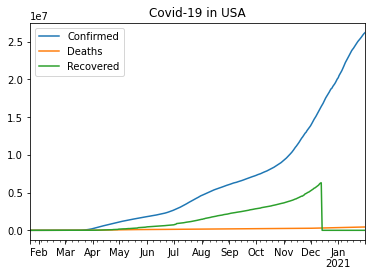

In [ ]:
us=get('US')
us.plot(title = 'Covid-19 in USA')

In [ ]:
#a definition that supports different countries, the code is nicer
def _get(country, name, data):
    query = data['Country/Region'] == country
    df = (data.loc[query].transpose()[4:])
    df.columns = [name]
    df.index = pd.to_datetime(df.index)
    return df

def get(country):
    return pd.concat((
        _get(country, '{}-Confirmed'.format(country), confirmed),
        _get(country, '{}-Deaths'.format(country), deaths),
        _get(country, '{}-Recovered'.format(country), recovered)
    ), axis='columns')

In [ ]:
pl = get('Poland')
us = get('US')

In [ ]:
pl.tail(n=8)

,Poland-Confirmed,Poland-Deaths,Poland-Recovered
2021-01-24,1475445,35363,1230446
2021-01-25,1478119,35401,1237736
2021-01-26,1482722,35665,1243575
2021-01-27,1489512,36054,1246267
2021-01-28,1496665,36443,1250892
2021-01-29,1502810,36780,1257352
2021-01-30,1508674,37082,1264574
2021-01-31,1513385,37180,1270467


In [ ]:
us.tail(n=5)

,US-Confirmed,US-Deaths,US-Recovered
2021-01-27,25598061,429195,0
2021-01-28,25766681,433195,0
2021-01-29,25932794,436799,0
2021-01-30,26074885,439530,0
2021-01-31,26186781,441324,0


In [ ]:
# Serving China which has many provinces ###

query =confirmed['Country/Region'] == 'China'
df = confirmed.loc[query].transpose()[4:]
df = df.sum(axis='columns').map(int)#sum column whitch  China provinces, map(int) - change for integer
df.index = pd.to_datetime(df.index)
df.columns = ['Confirmed']
df


2020-01-22       548
2020-01-23       643
2020-01-24       920
2020-01-25      1406
2020-01-26      2075
               ...  
2021-01-27     99655
2021-01-28     99746
2021-01-29     99848
2021-01-30     99968
2021-01-31    100063
Length: 376, dtype: int64

In [ ]:
# Serving China which has many provinces - the code is nicer ###

query =confirmed['Country/Region'] == 'China'
df = (confirmed
      .loc[query]
      .transpose()[4:]
      .sum(axis='columns')
      .map(int))#sum column whitch  China provinces, map(int) - change for integer
df.index = pd.to_datetime(df.index)
df.columns = ['Zachorowania']
df

2020-01-22       548
2020-01-23       643
2020-01-24       920
2020-01-25      1406
2020-01-26      2075
               ...  
2021-01-27     99655
2021-01-28     99746
2021-01-29     99848
2021-01-30     99968
2021-01-31    100063
Length: 376, dtype: int64

In [ ]:
def _get(country, name, data):
    if country:
        query = data['Country/Region'] == country
        data = data.loc[query]
        
    data = (data
            .transpose()[4:]
            .sum(axis='columns')
            .map(int))#sum column whitch  China provinces, map(int) - change for integer
    
    return pd.DataFrame(
        data = data,
        columns = [name],
        index = pd.to_datetime(data.index))

def get(country=None):
    return pd.concat((
        _get(country, '{}-Confirmed'.format(country), confirmed),
        _get(country, '{}-Deaths'.format(country), deaths),
        _get(country, '{}-Recovered'.format(country), recovered)
    ), axis='columns')

In [ ]:
world = get()

In [ ]:
world.tail(n=5)

,None-Confirmed,None-Deaths,None-Recovered
2021-01-27,100866032,2174548,55890582
2021-01-28,101457552,2191206,56043612
2021-01-29,102069223,2206457,56408774
2021-01-30,102583819,2219980,56762082
2021-01-31,102965855,2227905,57049238


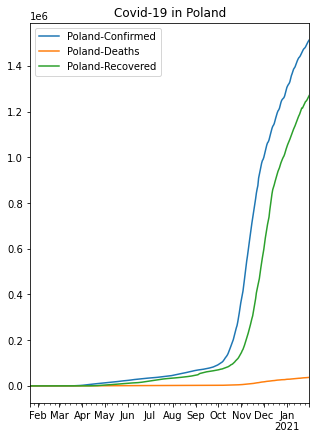

In [ ]:
poland = get('Poland')
poland.plot(figsize=(5,7), title="Covid-19 in Poland") #zmiana wielkości wykresu w calach

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d291e4128>,
      dtype=object)

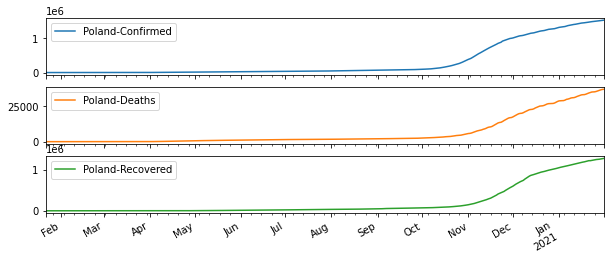

In [ ]:
poland.plot(subplots=True, figsize=(10,4)) #pokazanie trzech wartości w oddzielnych wykresach

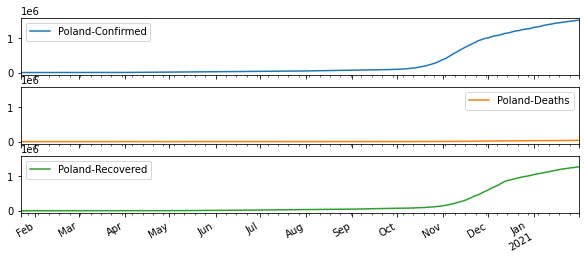

In [ ]:
_ = poland.plot(subplots=True,sharex=True, sharey=True, figsize=(10,4)) #mają tę samą skalę X i Y 

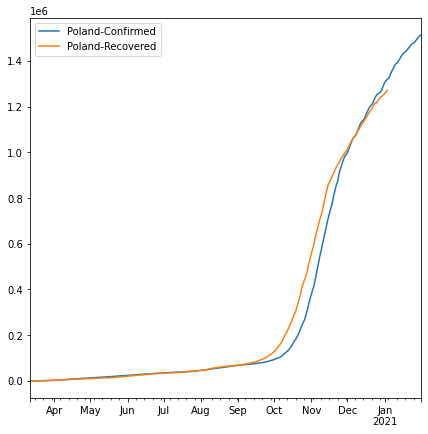

In [ ]:
c= poland['Poland-Confirmed'] #Korelacja Zachrowań i Wyzdrowień
r= poland['Poland-Recovered']
r.index = r.index - pd.Timedelta(days=14)
cr = pd.concat((
    c['2020-03-12':],
    r['2020-03-12':],
), axis='columns')
cr.plot(figsize=(7,7))


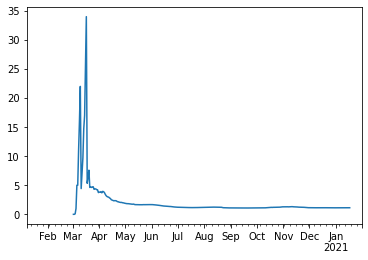

In [ ]:
(c/r).plot()#zależność zachorowań do wyzdrowień

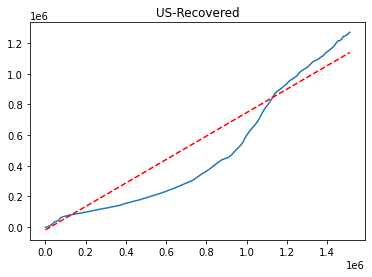

In [ ]:
## współczynnik wyzdrowień
import matplotlib.pyplot as plt
import numpy as np

x = c[:len(r)]
y = r

model = np.polyfit(x,y,1)
trend = np.poly1d(model)

plt.title('US-Recovered')
plt.plot(x, y, label = 'data')
plt.plot(x, trend(x), color='red', linestyle='--', label='trend')
plt.show()


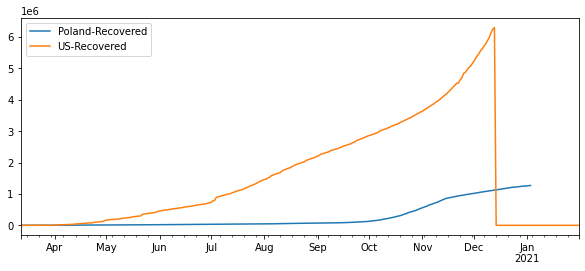

In [ ]:
pol= poland['Poland-Recovered']
usa= us['US-Recovered']
raz = pd.concat((
    pol['2020-03-12':],
    usa['2020-03-12':],
), axis='columns')
raz.plot(figsize=(10,4))

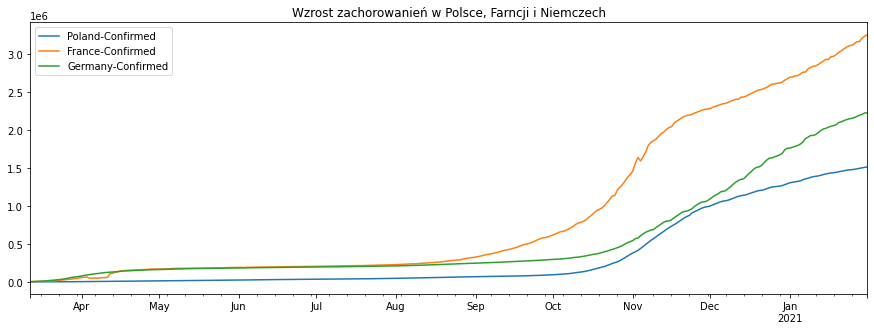

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

poland = get('Poland')['Poland-Confirmed']
france = get('France')['France-Confirmed']
germany = get('Germany')['Germany-Confirmed']
razem = pd.concat((
    poland['2020-03-12':],
    france['2020-03-12':],
    germany['2020-03-12':],
), axis='columns')
razem.plot(figsize=(15,5), title = 'Wzrost zachorowanień w Polsce, Farncji i Niemczech')
